In [1]:
import gdelt # for gdelt searchs
from gkg_tools import * # for gkg searchs
# %run "../gkg_tools.py" # using magic command run to access the script from the parent directory

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.tokenize import word_tokenize, sent_tokenize


from transformers import pipeline, set_seed
import torch

# # GPU Timing (using GPU 1) else -1 for CPU
device_id = 1 if torch.cuda.is_available() else -1 

here


In [2]:
gkg = gkg_operator() # create a gkg operator
manga = pd.read_csv('manga_soup_labeled.csv')
manga = manga[manga['sourcecommonname'].map(manga['sourcecommonname'].value_counts()) > 5]
# manga = manga.iloc[:,1:]
gkg.get_gkg(data=manga) # stores in gkg.gkg_query as a dataframe
gkg.parse_urls()
# gkg.get_gkg(data=OP) # stores in gkg.gkg_query as a dataframe
gkg.gkg_query.shape


(258, 38)

In [3]:
# import concurrent.futures
# from concurrent.futures import TimeoutError
# import pandas as pd
# import numpy as np

# # List to hold results for each URL
# results = []

# # Define the maximum time allowed per item
# timeout = 10

# # Iterate over each URL and fetch titles with a timeout
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     for url in gkg.urls:
#         # Submit the title-fetching task to the executor
#         future = executor.submit(gkg.get_title, url, verbose=True)
#         try:
#             # Wait for the result with a timeout
#             title = future.result(timeout=timeout)
#             print(gkg.urls.index(url))
#             results.append({"url": url, "title": title})
#         except TimeoutError:
#             print(f"Timeout for URL {url}, moving to next item.")
#             # Append URL with a NaN title if it times out
#             results.append({"url": url, "title": np.nan})

# # Convert the results list to a DataFrame
# df = pd.DataFrame(results)

# print(df)


In [4]:
# # merge df left onto manga by url
# merged = pd.merge(manga, df[['url', 'title']], left_on='documentidentifier', right_on='url', how='inner').drop(columns='url')
# merged.to_csv('manga_soup.csv')

In [5]:
gkg.get_all_soup(limit_output=5) # get the soup for all the urls in the dataframe
# gkg.get_all_soup(limit_output='all')

No text bounds set for this URL: https://comicbook.com/anime/news/dandadan-anime-hideo-kojima/
No text bounds set for this URL: https://comicbook.com/anime/news/my-hero-academia-season-7-finale/


In [6]:
gkg.all_soup_data

,URL,Parsed URL,Titles,Headers,Paragraphs
0,https://gamerant.com/one-piece-oda-reveals-leg...,one piece oda reveals legendary god elbaf,One Piece: Oda Reveals A Legendary God From Elbaf,"[Game Rant, One Piece: Oda Reveals A Legendary...",[This article contains spoilers from One Piece...
1,https://comicbook.com/anime/news/dandadan-anim...,dandadan anime hideo kojima,Dandadan Premiere Earns Stamp of Approval From...,[Dandadan Premiere Earns Stamp of Approval Fro...,[Hideo Kojima has shared his praise for Dandad...
2,https://comicbook.com/anime/news/my-hero-acade...,my hero academia season 7 finale,My Hero Academia Season 7 Shares First Look at...,[My Hero Academia Season 7 Shares First Look a...,[My Hero Academia has shared the first look at...
3,https://screenrant.com/spy-x-family-hints-jeev...,spy x family hints jeeves related damian easy ...,Spy x Family Has Been Dropping Hints That A Ke...,"[Screen Rant, Spy x Family Has Been Dropping H...",[Spy x Familyfeatures a cast of fascinating an...
4,https://gamerant.com/best-dongua-watch/,best dongua watch,Best Dongua To Watch,"[Game Rant, 10 Best Dongua To Watch, Ranked, 1...",[Murim donghua adaptationis a genre that focus...


In [7]:
# titles = gkg.all_soup_data['Titles'].tolist()
titles = gkg.gkg_query['title'].tolist()
# titles = gkg.parsed_urls

In [8]:
tv = TfidfVectorizer(stop_words='english')
f = tv.fit_transform(titles)
tva = pd.DataFrame(f.toarray(),columns=tv.get_feature_names_out())
tva

,10,100,1121,1128,1131,1132,11th,14,15,19,...,yokai,yoriichi,yoshinaga,young,yozakura,yuki,zeno,zone,zoro,ōgaki
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
256,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Sort in ascending order
sorted_sum = tva.sum(axis=0).sort_values(ascending=False)
sorted_sum[:10]

news       18.232378
anime      17.476427
piece      10.086910
network     9.902907
best        8.947961
new         6.569507
manga       6.359001
hero        6.328673
forum       6.243988
dragon      6.101926
dtype: float64

## Representing article titles using t-SNE

### Using TFidf Vectorizer

### Using `v2persons` Field with GKG Tools Vectorizer

In [10]:
# gkg.parse_gkg_field('v2persons')
# gkg.parse_gkg_field('persons')
gkg.parse_gkg_field('allnames')
# gkg.parse_gkg_field('organizations')
# gkg.parse_gkg_field('v2themes')
# gkg.parse_gkg_field('amounts')
# gkg.parse_gkg_field('v2tone')

,index,allnames_0,allnames_1
0,0,Sun God Nika,47
1,0,Sun God,133
2,0,Elbaf Arc,351
3,0,One Piece,700
4,0,Sun God,918
...,...,...,...
5423,257,One Piece,7244
5424,257,Shonen Jump,7394
5425,257,Manga Plus,7413
5426,257,One Piece,7471


In [11]:
gkg.vectorize_field(weight='weighted')
gkgvf_arr = gkg.vectorized_df.copy()
gkgvf_arr.values

c:\Users\Corey Dearing\Desktop\gdelt\LLM_projects\gkg_tools.py:140: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
c:\Users\Corey Dearing\Desktop\gdelt\LLM_projects\gkg_tools.py:167: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  aligned_tokens = aligned_tokens.applymap(get_weight)  # Apply weighting function to each token count


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


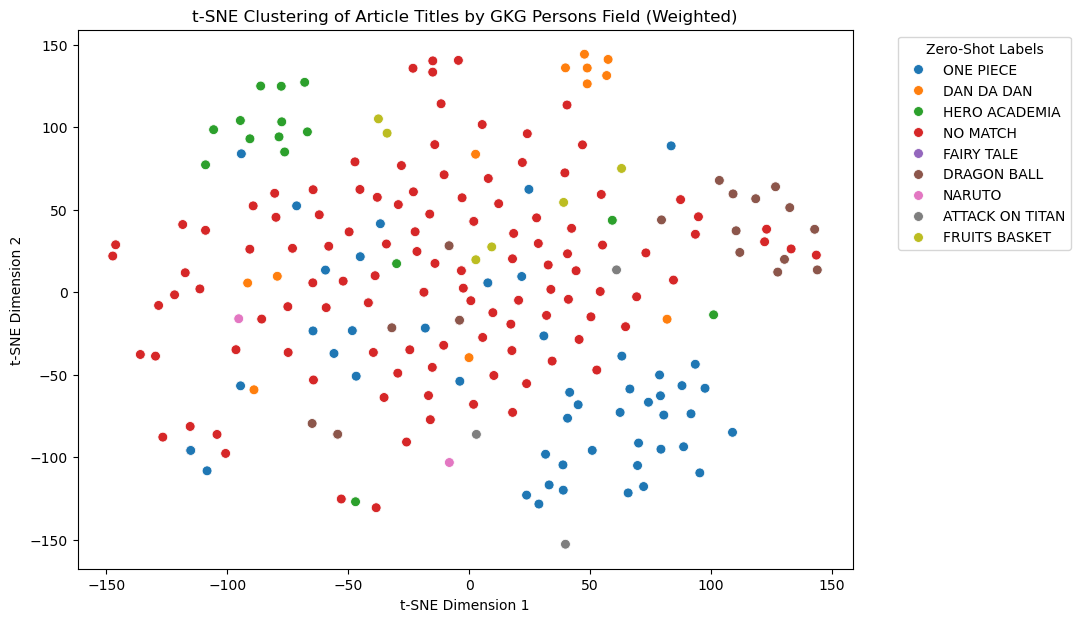

In [12]:
# titles: List of article titles
# tfidf_matrix: TF-IDF matrix used as input for t-SNE
# labels: List of labels for each article
labels = gkg.gkg_query['label']
# Step 2: Use t-SNE to reduce dimensions
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
# tsne_results = tsne_model.fit_transform(tfidf_matrix.toarray())
tsne_results = tsne_model.fit_transform(gkgvf_arr.values)

# Step 3: Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = titles  # Optionally add titles as a label
tsne_df['Label'] = labels  # Add labels as a new column

# Step 4: Visualize with seaborn, using 'Label' as the hue to color by labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Label', data=tsne_df, s=50)
plt.title("t-SNE Clustering of Article Titles by GKG Persons Field (Weighted)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Zero-Shot Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming gkgvf_arr is the DataFrame with vectorized values and article titles as the index
# The values are used as input to the t-SNE model, and index rows are the article titles

# article_titles = gkg.parsed_urls  # Extract titles from the index
model_input = gkgvf_arr.values  # Use the values for t-SNE
article_titles = titles  # Extract titles from the index
# model_input = tfidf_matrix.toarray()  # Use the values for t-SNE
labels = gkg.gkg_query['label']

# Step 1: Use t-SNE to reduce dimensions
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_results = tsne_model.fit_transform(model_input)

# Step 2: Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = article_titles  # Add titles from the index

# Step 3: Plot with Plotly to add hover functionality
fig = px.scatter(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    hover_name='Title',  # This will show the title when hovering
    title="t-SNE Clustering of Article Titles",
    labels={'TSNE1': 't-SNE Dimension 1', 'TSNE2': 't-SNE Dimension 2'}
)

# Display the plot
fig.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [14]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming `article_titles`, `model_input`, and `labels` are already defined
# article_titles: List of article titles
# model_input: Matrix of TF-IDF values for t-SNE
# labels: Corresponding labels for each article

# Step 1: Use t-SNE to reduce dimensions
tsne_model = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_results = tsne_model.fit_transform(model_input)

# Step 2: Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Title'] = article_titles  # Add titles to the DataFrame
tsne_df['Label'] = labels  # Add labels to the DataFrame

# Step 3: Plot with Plotly, coloring by 'Label'
fig = px.scatter(
    tsne_df,
    x='TSNE1',
    y='TSNE2',
    color='Label',           # Use labels to color points
    hover_name='Title',       # Show article title on hover
    title="t-SNE Clustering of Article Titles by Label",
    labels={'TSNE1': 't-SNE Dimension 1', 'TSNE2': 't-SNE Dimension 2'}
)

# Display the plot
fig.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.

